In [1]:
import os
from os.path import join
import numpy as np
import pandas as pd
from glob import glob
from math import sqrt
%matplotlib inline
import seaborn as sns
sns.set_palette('muted')
import matplotlib.pyplot as plt

## Obtain counts and average RT

In [33]:

subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_003', 'WMAZE_004', 'WMAZE_005',
        'WMAZE_006', 'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']

#subs = ['WMAZE_002']

# Array containing the three sets
stim_sets = ['set1', 'set2', 'set3']

count_table = {}
ctstd_table = {}
rt_table = {}
rtstd_table = {}

# Loop to grab correct 6 run text files for each subject
for sub in subs:
    ct_dict = {}
    rt_dict = {}
    # Array containing path to behavior files
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    # Array containing current sub's 6 behavior file runs
    dir_file = glob(join(sub_dir, '{0}_wmazebl_2015*.txt'.format(sub)))    
    # Sort current sub's txt files in order of run
    dir_file.sort() 

       
    # Loop through each of the set types 
    for i, curr_set in enumerate(stim_sets):
        # Create dataframe for text files to extract EVS
        # Run 1
        run1 = pd.read_table(dir_file[i * 2])
        # Run 2
        run2 = pd.read_table(dir_file[i * 2 + 1])


        # Convert dataframes into numpy arrays for trial type and correct/incorrect
        # Run 1
        run1_trialtype = run1['TrialType'].values
        run1_correct = run1['Correct'].values
        run1_onset_time = run1['StimOnset'].values
        # Run 2
        run2_trialtype = run2['TrialType'].values
        run2_correct = run2['Correct'].values
        run2_onset_time = run2['StimOnset'].values

        # Shift the TrialType column up by 1 and insert dummy element into the first index
        # Run 1
        run1_trial_shift = run1_trialtype[1:] 
        run1_trial_shift = np.insert(run1_trial_shift, run1_trial_shift.shape[0], -1)
        
        # Run 2
        run2_trial_shift = run2_trialtype[1:]
        run2_trial_shift = np.insert(run2_trial_shift, run2_trial_shift.shape[0], -1)

        # Shift the Correct column up by 1 and insert dummy element into the first index
        # Run 1
        run1_correct_shift = run1_correct[1:]
        run1_correct_shift = np.insert(run1_correct_shift, -1, -1)
        # Run 2
        run2_correct_shift = run2_correct[1:]
        run2_correct_shift = np.insert(run2_correct_shift, -1, -1)
       
        
        # Run 1       
        run1_f_corr = np.where((run1_correct == 1) & ((run1_trialtype == 'A') | (run1_trialtype == 'C')))
                                    
        run1_f_incorr = np.where((run1_correct == 0) & ((run1_trialtype == 'A') | (run1_trialtype == 'C')))
        
        run1_c_corr = np.where((run1_correct == 1) & (run1_trialtype == 'B'))
                                    
        run1_c_incorr = np.where((run1_correct == 0) & (run1_trialtype == 'B'))
        
        run1_f_b4_B_corr = np.where(((run1_trial_shift == 'B') & (run1_correct_shift == 1)) 
                                          & (run1_trialtype != 'BL'))
        
        run1_f_b4_B_incorr = np.where(((run1_trial_shift == 'B') & (run1_correct_shift == 0)) 
                                            & (run1_trialtype != 'BL'))
        
        run1_fixC_b4_cond_corr = np.where(((run1_trial_shift == 'B') & (run1_correct_shift == 1) 
                                                     & (run1_correct == 1)) & (run1_trialtype != 'BL'))
        run1_fixI_b4_cond_corr = np.where(((run1_trial_shift == 'B') & (run1_correct_shift == 1)
                                                      & (run1_correct != 1)) & (run1_trialtype != 'BL'))
        run1_fixC_b4_cond_incorr = np.where(((run1_trial_shift == 'B') & (run1_correct_shift == 0) 
                                                      & (run1_correct == 1)) & (run1_trialtype != 'BL'))
        run1_fixI_b4_cond_incorr = np.where(((run1_trial_shift == 'B') & (run1_correct_shift == 0)
                                                        & (run1_correct != 1)) & (run1_trialtype != 'BL'))    
        
                                                

        

        # Run 2    
        run2_f_corr = np.where((run2_correct == 1) & ((run2_trialtype == 'A') | (run2_trialtype == 'C')))
                                    
        run2_f_incorr = np.where((run2_correct == 0) & ((run2_trialtype == 'A') | (run2_trialtype == 'C')))
        
        run2_c_corr = np.where((run2_correct == 1) & (run2_trialtype == 'B'))
                                    
        run2_c_incorr = np.where((run2_correct == 0) & (run2_trialtype == 'B'))
        
        run2_f_b4_B_corr = np.where(((run2_trial_shift == 'B') & (run2_correct_shift == 1)) 
                                          & (run2_trialtype != 'BL'))
        
        run2_f_b4_B_incorr = np.where(((run2_trial_shift == 'B') & (run2_correct_shift == 0))
                                            & (run2_trialtype != 'BL'))
        
        run2_fixC_b4_cond_corr = np.where(((run2_trial_shift == 'B') & (run2_correct_shift == 1) 
                                                     & (run2_correct == 1)) & (run2_trialtype != 'BL'))
        run2_fixI_b4_cond_corr = np.where(((run2_trial_shift == 'B') & (run2_correct_shift == 1)
                                                      & (run2_correct != 1)) & (run2_trialtype != 'BL'))
        run2_fixC_b4_cond_incorr = np.where(((run2_trial_shift == 'B') & (run2_correct_shift == 0) 
                                                      & (run2_correct == 1)) & (run2_trialtype != 'BL'))
        run2_fixI_b4_cond_incorr = np.where(((run2_trial_shift == 'B') & (run2_correct_shift == 0)
                                                        & (run2_correct != 1)) & (run2_trialtype != 'BL'))        
        
                   
        # All RTs
        run1_RTs = run1['RT']
        run2_RTs = run2['RT']
        
        # Run 1  
        run1_f_corr_RTs = run1_RTs.values[run1_f_corr[0]]
        run1_f_incorr_RTs = run1_RTs.values[run1_f_incorr[0]]
        run1_c_corr_RTs = run1_RTs.values[run1_c_corr[0]]
        run1_c_incorr_RTs = run1_RTs.values[run1_c_incorr[0]] 
        run1_f_b4_B_corr_RTs = run1_RTs.values[run1_f_b4_B_corr[0]]
        run1_f_b4_B_incorr_RTs = run1_RTs.values[run1_f_b4_B_incorr[0]]
        run1_fixC_b4_cond_corr_RTs = run1_RTs.values[run1_fixC_b4_cond_corr[0]]
        run1_fixI_b4_cond_corr_RTs = run1_RTs.values[run1_fixI_b4_cond_corr[0]]
        run1_fixC_b4_cond_incorr_RTs = run1_RTs.values[run1_fixC_b4_cond_incorr[0]]
        run1_fixI_b4_cond_incorr_RTs = run1_RTs.values[run1_fixI_b4_cond_incorr[0]]
        

        # Run 2 
        run2_f_corr_RTs = run2_RTs.values[run2_f_corr[0]]
        run2_f_incorr_RTs = run2_RTs.values[run2_f_incorr[0]]
        run2_c_corr_RTs = run2_RTs.values[run2_c_corr[0]]
        run2_c_incorr_RTs = run2_RTs.values[run2_c_incorr[0]]         
        run2_f_b4_B_corr_RTs = run2_RTs.values[run2_f_b4_B_corr[0]]
        run2_f_b4_B_incorr_RTs = run2_RTs.values[run2_f_b4_B_incorr[0]]
        run2_fixC_b4_cond_corr_RTs = run2_RTs.values[run2_fixC_b4_cond_corr[0]]
        run2_fixI_b4_cond_corr_RTs = run2_RTs.values[run2_fixI_b4_cond_corr[0]]
        run2_fixC_b4_cond_incorr_RTs = run2_RTs.values[run2_fixC_b4_cond_incorr[0]]
        run2_fixI_b4_cond_incorr_RTs = run2_RTs.values[run2_fixI_b4_cond_incorr[0]]
    
        
        #Creation of a flexible naming convention for dictionary keys & contents        
        for curr_type in ['f', 'c', 'f_b4_B', 'fixC_b4_cond', 'fixI_b4_cond']:
            for acc in ['corr', 'incorr']:
                curr_name = '{0}_{1}'.format(curr_type, acc)
                rt_name = '{0}_{1}_RTs'.format(curr_type, acc)
                if not curr_name in ct_dict:
                    ct_dict[curr_name] = []
                ct_dict[curr_name].append(len(eval('run1_' + curr_name)[0]))
                ct_dict[curr_name].append(len(eval('run2_' + curr_name)[0]))
                if not rt_name in rt_dict:
                    rt_dict[rt_name] = []
                rt_eval = eval('run1_' + rt_name)
                # Remove NaN from counts
                rt_notNaN = np.where(rt_eval >= 0)
                rt_notNaN = rt_eval[rt_notNaN[0]]           
                if rt_notNaN.shape[0] == 0:
                    rt_dict[rt_name].append(None)                       
                else:
                    rt_dict[rt_name].append(np.average(rt_notNaN))

                rt_eval = eval('run2_' + rt_name)
                # Remove NaN from RT calculations
                rt_notNaN = np.where(rt_eval >= 0)
                rt_notNaN = rt_eval[rt_notNaN[0]]           
                if rt_notNaN.shape[0] == 0:
                    rt_dict[rt_name].append(None)                       
                else:
                    rt_dict[rt_name].append(np.average(rt_notNaN))                   
    
    for key in ct_dict:
        ct_dict[key] = np.sum(ct_dict[key])
        if not key in count_table:
            count_table[key] = []
        count_table[key].append(ct_dict[key])
        
        
    for key in rt_dict:
        rt_notNONE = np.where(np.array(rt_dict[key]) >= 0)
        #print rt_notNONE
        rt_dict[key] = np.average(np.array(rt_dict[key])[rt_notNONE[0]])
        if not key in rt_table:
            rt_table[key] = []
        rt_table[key].append(rt_dict[key])

        
df = pd.DataFrame(count_table, index = subs) 
df2 = pd.DataFrame(rt_table, index = subs) 

/home/data/madlab/envs/emu_madlab_env/lib/python2.7/site-packages/ipykernel/__main__.py:162: RuntimeWarning: invalid value encountered in greater_equal
/home/data/madlab/envs/emu_madlab_env/lib/python2.7/site-packages/ipykernel/__main__.py:171: RuntimeWarning: invalid value encountered in greater_equal


In [34]:
import matplotlib.pyplot as plt

ct_avg = {}
ct_std = {}

for curr_key in count_table:
    ct_avg[curr_key] = np.average(count_table[curr_key])
    ct_std[curr_key] = np.std(count_table[curr_key])
    
count_average = pd.DataFrame(ct_avg, index = (1,))
count_std = pd.DataFrame(ct_std, index = (1,))

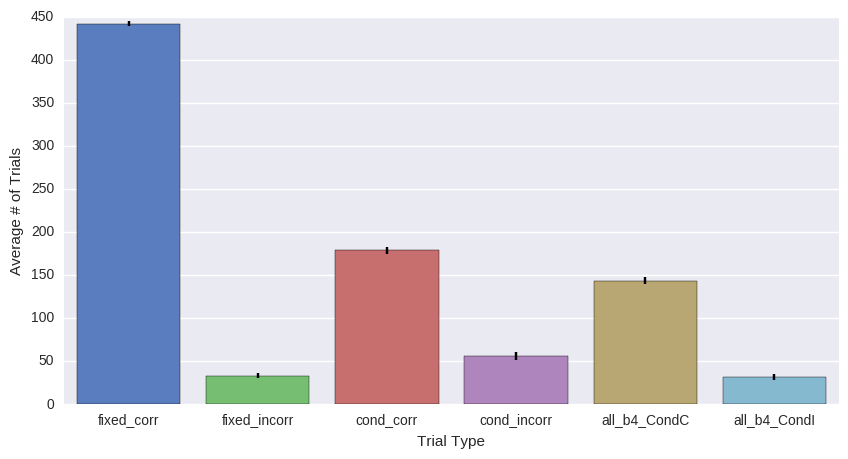

In [35]:
import matplotlib.pyplot as plt

N = 6
conditions = ['fixed_corr', 'fixed_incorr', 'cond_corr', 'cond_incorr', 
              'all_b4_CondC', 'all_b4_CondI']
means_allsubjs = [df['f_corr'].mean(), 
                  df['f_incorr'].mean(),
                  df['c_corr'].mean(), 
                  df['c_incorr'].mean(), 
                  df['f_b4_B_corr'].mean(), 
                  df['f_b4_B_incorr'].mean()]

sem_allsubjs = [df['f_corr'].std()/(np.sqrt(len(subs))), 
                df['f_incorr'].std()/(np.sqrt(len(subs))),
                df['c_corr'].std()/(np.sqrt(len(subs))),
                df['c_incorr'].std()/(np.sqrt(len(subs))),
                df['f_b4_B_corr'].std()/(np.sqrt(len(subs))), 
                df['f_b4_B_incorr'].std()/(np.sqrt(len(subs)))]

ind = np.arange(N)
width = 0.5

fig, ax = plt.subplots(figsize = (10,5))

ax = sns.barplot(ind, means_allsubjs, yerr = sem_allsubjs, ecolor = 'black')


ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_xlabel("Trial Type")
ax.set_ylabel("Average # of Trials")

plt.show()

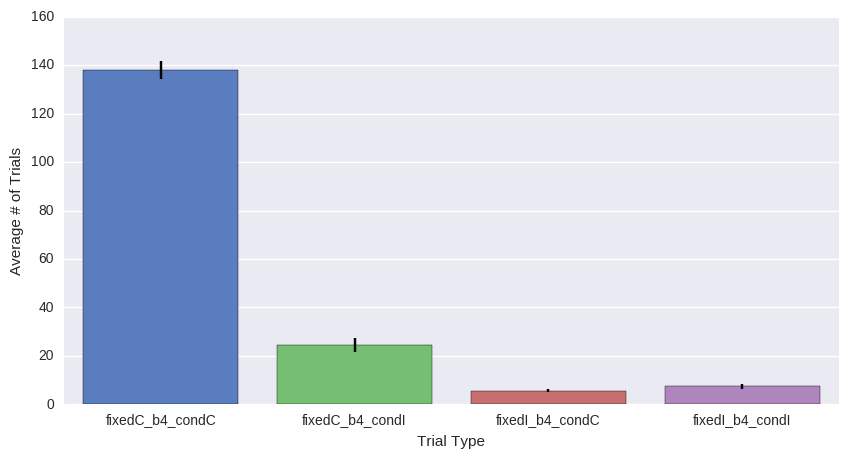

In [36]:
import matplotlib.pyplot as plt

N = 4
conditions = ['fixedC_b4_condC', 'fixedC_b4_condI', 'fixedI_b4_condC', 'fixedI_b4_condI']
means_allsubjs = [df['fixC_b4_cond_corr'].mean(), 
                  df['fixC_b4_cond_incorr'].mean(),
                  df['fixI_b4_cond_corr'].mean(), 
                  df['fixI_b4_cond_incorr'].mean()]

sem_allsubjs = [df['fixC_b4_cond_corr'].std()/(np.sqrt(len(subs))), 
                df['fixC_b4_cond_incorr'].std()/(np.sqrt(len(subs))),
                df['fixI_b4_cond_corr'].std()/(np.sqrt(len(subs))),
                df['fixI_b4_cond_incorr'].std()/(np.sqrt(len(subs)))]

ind = np.arange(N)
width = 0.5

fig, ax = plt.subplots(figsize = (10,5))

ax = sns.barplot(ind, means_allsubjs, yerr = sem_allsubjs, ecolor = 'black')


ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_xlabel("Trial Type")
ax.set_ylabel("Average # of Trials")

plt.show()

In [37]:
count_average

,c_corr,c_incorr,f_b4_B_corr,f_b4_B_incorr,f_corr,f_incorr,fixC_b4_cond_corr,fixC_b4_cond_incorr,fixI_b4_cond_corr,fixI_b4_cond_incorr
1,179.05,56.3,143.7,31.85,441.8,33.45,138.1,24.45,5.6,7.4


In [38]:
count_std

,c_corr,c_incorr,f_b4_B_corr,f_b4_B_incorr,f_corr,f_incorr,fixC_b4_cond_corr,fixC_b4_cond_incorr,fixI_b4_cond_corr,fixI_b4_cond_incorr
1,17.928957,18.490809,15.975293,14.220672,12.925169,11.951883,16.579807,13.097614,2.457641,4.091455


In [39]:
print "WMAZE Counts"
# Counts within participanct may not sum to 240 (number of B trials) --
# Conditionals require a correct/incorrect response from both A & B trials --
# Non-response trials on either will remove trials from that possible total
df

WMAZE Counts


,c_corr,c_incorr,f_b4_B_corr,f_b4_B_incorr,f_corr,f_incorr,fixC_b4_cond_corr,fixC_b4_cond_incorr,fixI_b4_cond_corr,fixI_b4_cond_incorr
WMAZE_001,190,48,147,24,448,29,139,18,8,6
WMAZE_002,204,27,169,9,444,27,163,3,6,6
WMAZE_003,179,53,142,30,436,36,138,20,4,10
WMAZE_004,182,54,144,28,441,34,137,25,7,3
WMAZE_005,191,47,150,35,430,48,141,22,9,13
WMAZE_006,176,61,141,37,450,27,139,29,2,8
WMAZE_007,168,68,127,42,438,38,125,33,2,9
WMAZE_008,170,65,143,31,426,52,133,21,10,10
WMAZE_009,166,71,138,35,438,36,134,26,4,9
WMAZE_010,129,107,96,70,441,30,89,64,7,6


## Calculations for Reaction Time (across subs)

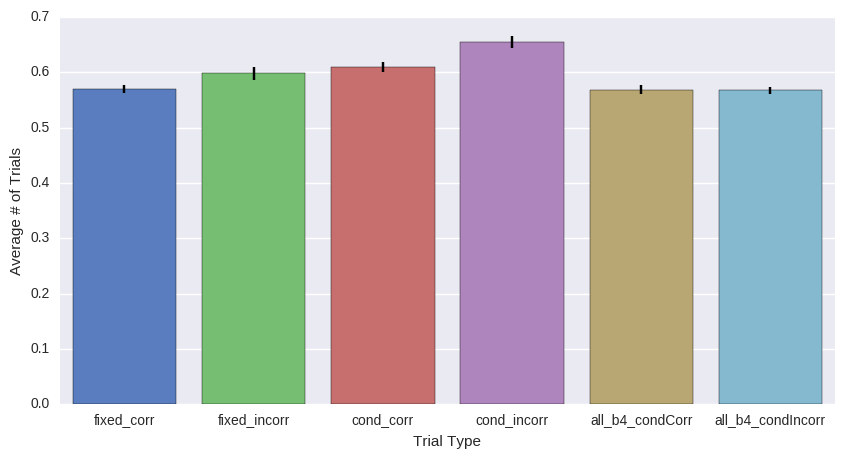

In [27]:
import matplotlib.pyplot as plt

N = 6
conditions = ['fixed_corr', 'fixed_incorr', 'cond_corr', 'cond_incorr', 
              'all_b4_condCorr', 'all_b4_condIncorr']
means_allsubjs = [df2['f_corr_RTs'].mean(), 
                  df2['f_incorr_RTs'].mean(),
                  df2['c_corr_RTs'].mean(), 
                  df2['c_incorr_RTs'].mean(), 
                  df2['f_b4_B_corr_RTs'].mean(), 
                  df2['f_b4_B_incorr_RTs'].mean()]

sem_allsubjs = [df2['f_corr_RTs'].std()/(np.sqrt(len(subs))), 
                df2['f_incorr_RTs'].std()/(np.sqrt(len(subs))),
                df2['c_corr_RTs'].std()/(np.sqrt(len(subs))),
                df2['c_incorr_RTs'].std()/(np.sqrt(len(subs))),
                df2['f_b4_B_corr_RTs'].std()/(np.sqrt(len(subs))), 
                df2['f_b4_B_incorr_RTs'].std()/(np.sqrt(len(subs)))]

ind = np.arange(N)
width = 0.5

fig, ax = plt.subplots(figsize = (10,5))

ax = sns.barplot(ind, means_allsubjs, yerr = sem_allsubjs, ecolor = 'black')


ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_xlabel("Trial Type")
ax.set_ylabel("Average # of Trials")

plt.show()

In [29]:
rt_average ={}
rt_std = {}

for curr_key in rt_table:
    rt_average[curr_key] = np.average(rt_table[curr_key])
    rt_std[curr_key] = np.average(rt_table[curr_key])
    
RT_average = pd.DataFrame(rt_average, index = (1,))
RT_std = pd.DataFrame(rt_std, index = (1,))

In [30]:
RT_average

,c_corr_RTs,c_incorr_RTs,f_b4_B_corr_RTs,f_b4_B_incorr_RTs,f_corr_RTs,f_incorr_RTs,fixC_b4_cond_corr_RTs,fixC_b4_cond_incorr_RTs,fixI_b4_cond_corr_RTs,fixI_b4_cond_incorr_RTs
1,0.609197,0.655332,0.568674,0.567037,0.569634,0.598113,0.567639,0.56243,0.617719,0.586382


In [31]:
RT_std

,c_corr_RTs,c_incorr_RTs,f_b4_B_corr_RTs,f_b4_B_incorr_RTs,f_corr_RTs,f_incorr_RTs,fixC_b4_cond_corr_RTs,fixC_b4_cond_incorr_RTs,fixI_b4_cond_corr_RTs,fixI_b4_cond_incorr_RTs
1,0.609197,0.655332,0.568674,0.567037,0.569634,0.598113,0.567639,0.56243,0.617719,0.586382


In [32]:
print "WMAZE Average RT"
df2

WMAZE Average RT


,c_corr_RTs,c_incorr_RTs,f_b4_B_corr_RTs,f_b4_B_incorr_RTs,f_corr_RTs,f_incorr_RTs,fixC_b4_cond_corr_RTs,fixC_b4_cond_incorr_RTs,fixI_b4_cond_corr_RTs,fixI_b4_cond_incorr_RTs
WMAZE_001,0.612143,0.666230,0.547730,0.572550,0.549744,0.539586,0.545936,0.572923,0.526488,0.572987
WMAZE_002,0.568777,0.713987,0.558904,0.625072,0.564243,0.590857,0.555932,0.541806,0.625066,0.677818
WMAZE_003,0.654225,0.706909,0.611168,0.610372,0.614501,0.680748,0.617614,0.611082,0.654272,0.622334
WMAZE_004,0.598331,0.660192,0.556123,0.572005,0.561868,0.640627,0.549273,0.554001,0.733466,0.777871
WMAZE_005,0.623309,0.669855,0.608021,0.577168,0.607618,0.656450,0.606943,0.613314,0.597154,0.569194
WMAZE_006,0.602315,0.642592,0.592547,0.597059,0.596876,0.565559,0.593655,0.594022,0.516785,0.587873
WMAZE_007,0.594632,0.649797,0.532695,0.522794,0.523946,0.537770,0.531734,0.527999,0.591761,0.528976
WMAZE_008,0.536982,0.558380,0.519272,0.524031,0.520848,0.513920,0.518737,0.518470,0.553434,0.519744
WMAZE_009,0.636931,0.695901,0.605575,0.578032,0.597295,0.614542,0.604599,0.556486,0.658419,0.597303
WMAZE_010,0.615212,0.630917,0.591255,0.579832,0.583265,0.633971,0.591233,0.579240,0.556755,0.597301
